<a href="https://colab.research.google.com/github/DAVIAMERICO242/SQL/blob/main/SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***What does SQL actually do?***

SQL often seeks to make us able to query on a relational based database which deals with entities and relationships among those ones. Entities are often go as some table which gives us the attributes evaluated at the entity label. A relational database has some entities and a structural schema to relate them among, that schema is basically based on foreign keys and primary keys, a foreign key is an attribute in a weak entity which there also exists in a strong entity where the weak entity depends its existence from, each entity has a primary key in order to ensure uniqueness. Here we're using the data from https://github.com/Microsoft/sql-server-samples/tree/master/samples/databases/northwind-pubs we're calling it as **Northwind**, below we got some of the tables description:

- Suppliers: Suppliers and vendors of Northwind.

- Customers: Customers who buy products from Northwind.

- Employees: Employee details of Northwind traders.

- Products: Product information.

- Shippers: The details of the shippers who ship the products from the traders to the end-customers.

- Orders and Order_Details: Sales Order transactions taking place between the customers & the company.

#***Our data***

Here we're extracting the data by basically copying all scripts from the raw files on the link above and running it all on a sql query... Below we have the tables (its prefix as dbo.) for our data, we can get them by the **Object explorer** (in SQL Server) and getting in **Northwind** then **Tables**.

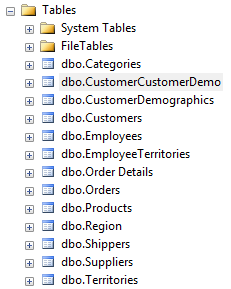

It's pretty important to be able to look what the diagram looks like as we're querying over it and we need get relations that there really exists in the schema, it's perfomed by associating the foreign keys to the attributes of the stronger entity where those foreign keys were generated from, we can look the relational schema by opening the **Databases** file and right after open **Northwind**:

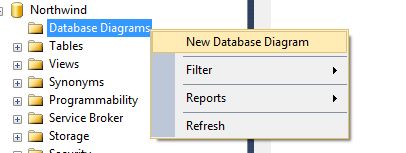

and adding all tables below... :

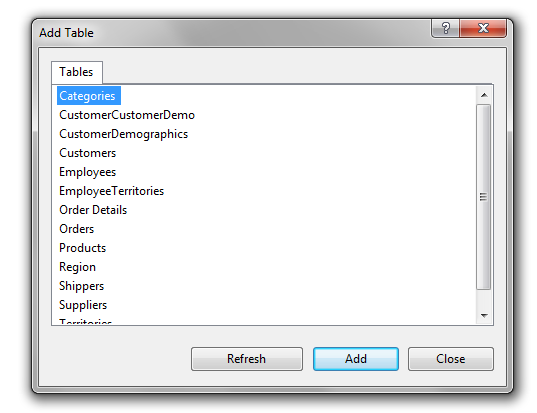

So we can look a chunk of the relational schema:

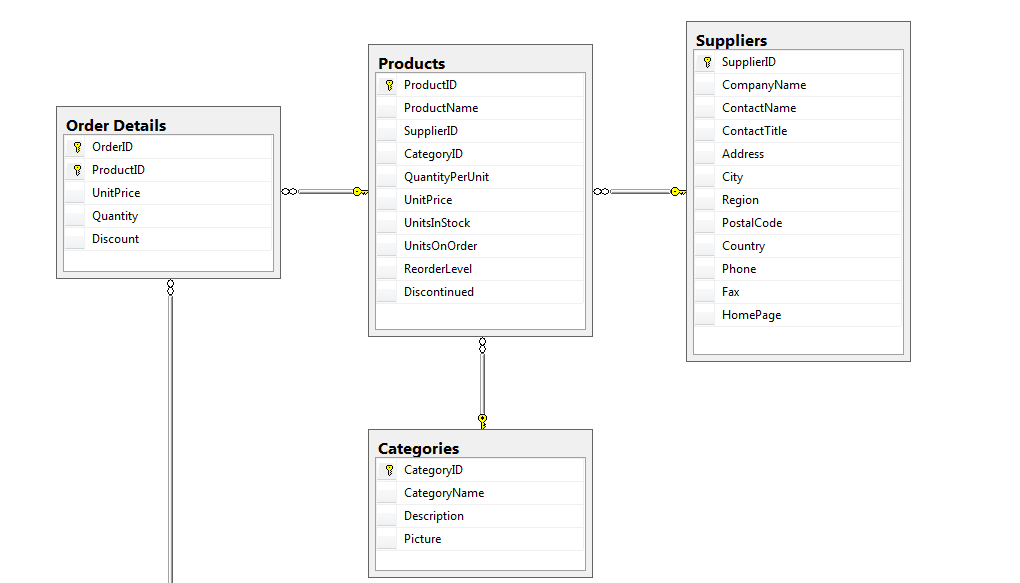

There is so more stuff in that diagram but the image would be too large to print.





# ***Queries:***

A query can viewd an extraction of some subdata or an information from the whole data based at some constraints and what kind of information you're looking for.

# *SELECT, FROM, WHERE, ORDER BY*:

Now suppose we would like to look up the order ID regarding each **ProcutName** that's what products were ordered in a specific order. When we're starting a new query we must call the database we're using so right after we must use *SELECT* to select the attributes we are interested in and *FROM* to states which tables they are from, then SQL perfoms a cartesian product between those tables that's it gets us a new table with two columns (equivalently to how many attributes you've stated in *SELECT*) where the rows are as the combinations between the rows of each table but there would be some incorrect relationships because we must to ensure some matching where the attributes used to make a foreign key match the regarding foreign keys, we can go that by stating the clause *WHERE* and so we have to use *ORDER BY*/*ORDER BY " " ASC* to order, at the ascending way, the Order ID by its value or *ORDER BY " " DESC* for descending way, if it hadn't been done the output would be shuffled to look up. Then we have the input script as follows:
 
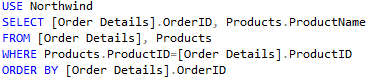

A part of our output is given by:

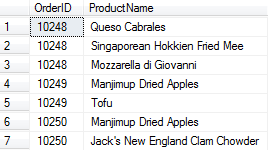

If there are some more attributes in *SELECT* we should to look up the path of diagram and connect the keys in this path.

#*AS, GROUP BY, HAVING, DISTINCT, SUBQUERIES, CORRELATED SUBQUERIES, STATS, ANY, ALL, IN, NOT, EXISTS, NOT EXISTS*:

Here we're looking through a little bit further than before. *AS* is a clause to give a some table or column an alias, *GROUP BY* makes a group based on the unique labels of some attribute, at each label we generally evaluate some statistic measures based on a some associated attribute, *HAVING* cotains some conditionals statements about the drawned groups, every attribute in *GROUP BY* must be at *SELECT*, we often choose some unique attribute to put in *GROUP BY* as first attribute, *DISTINCT* takes repeated values off from the output of *SELECT* clause, it's used right before the variable name, *SUBQUERIES* are queries into the main query, *CORRELATED SUBQUERIES* are *SUBQUERIES* where we use values from the outer subquery into (often stating some alias), *STATS* are statistic measures (*AVG*, *VAR*, *SUM*,...) often used with *HAVING* and these below are boolean functions:

- *ANY*: This clause is used after the operations either "=, <>, !=, >, >=, <,<=" that returns true if any of values, into *ANY* clause, meets the comparation based on given operation.

- *ALL*: It's also used after "=, <>, !=, >, >=, <,<=" and returns true if all of values into *ALL* clause meets the stated comparation.

- *IN*: returns true for the object values right before *IN* which are in the given vector after the *IN* clause.

- *NOT IN*: returns true for the object values right before *NOT IN* which are not in the given vector after the *NOT IN* clause.

- *EXISTS*: often stated right before the *WHERE* clause, we usually have a subquery right after *EXISTS*, this clause returns true if the subquery output returns a zero dimensional table.  

- *NOT EXISTS*: also often stated right before the *WHERE* clause, we usually also have a subquery right after *NOT EXISTS*, this clause returns true if the subquery output doesn't return a zero dimensional table (there is no records in output).

NOTE: When we're using *ANY* or *ALL* often have a comparation one-to-all for each row right before the operator that's we often compare a row with "all" (*ANY* pretty seems stop when the first match is done) values in the vector and so on until all rows have been passed through.

Suppose we would like to get how many products in each category there are, the name of category is in **Categories** table, the quantity is in **Order Details** table but looking the diagram below we notice there are no keys linking them both:

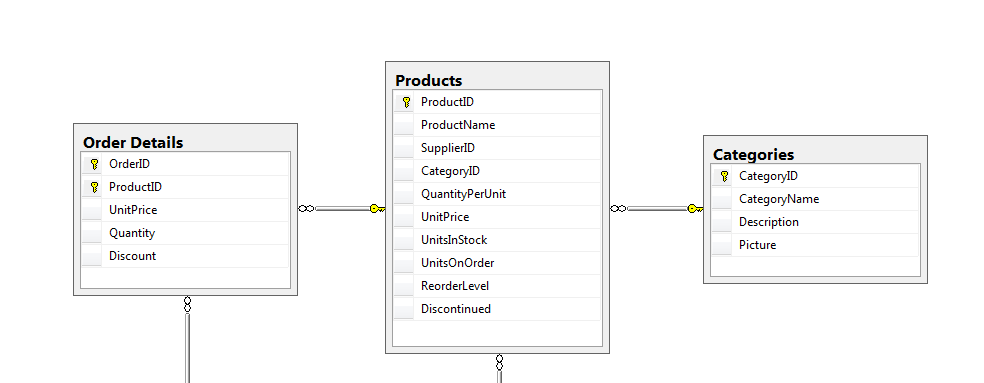

So we need to use the intermidiate attribute **products** in order to we be able to get the rows with correct relationships. Then we have:

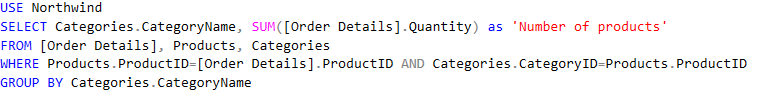

With output:

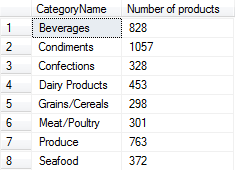

By a subquery we can search the product IDs which haven't been ordered yet, on subqueries we can compare a set of values in the original query to other values which have been got as a subquery output, so we have:

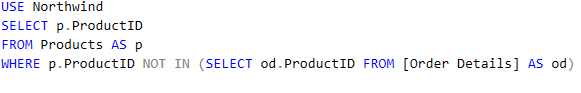

Above we're taking the ID of the products which are not recorded in **Order Details** historic but it tells us all products ID have been ordered, some users would rather use the *EXISTS* clause but as I barely got how it actually works with *WHERE*..., the query above returns us nothing so we didn't show its output.


Now suppose we are seeking for the category names which the number of ordered products overs the average of how many products there are in each category, solving that requires using correlated subquery, below at line 6 we are asking for the number of products that overs the average, the average is given by the subquery output.

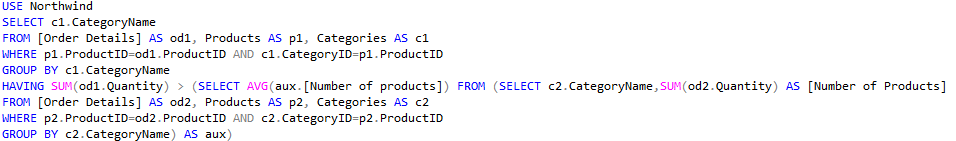

having output as:

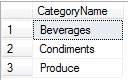

We can also use *ALL* to get the category regarding the greatest quantity of products:

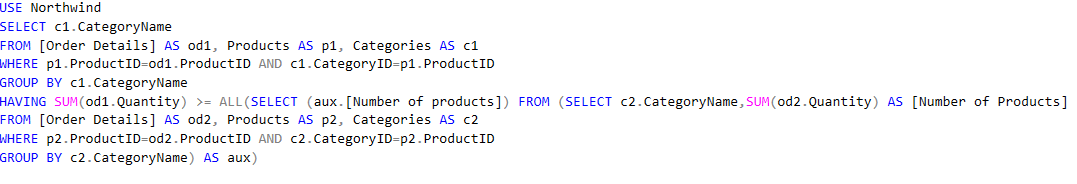

Having the output:

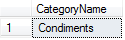

#*INNER JOIN, LEFT OUTER JOIN, RIGHT OUTER JOIN*: 

- *INNER JOIN*: it works the same as *WHERE* does when it's used to match keys, its syntax is "table1 *INNER JOIN* table2 ON table1.key=table2.key".

- *LEFT OUTER JOIN*: it works almost the same as *INNER JOIN* but we're allowing the output to show us all rows from the left table (the table right before *LEFT OUTER JOIN* ) no matter if there was a match to the right table key.

- *RIGHT OUTER JOIN*: the same as *LEFT OUTER JOIN* but in right table.

Now we want to get the **ContactName** and the **OrderDate** but we would also like to show up in the ouput the values of **ContactName** which there were no orders that's where **OrderDate** is NULL in output table. Below we notice that we just have to compare two keys:

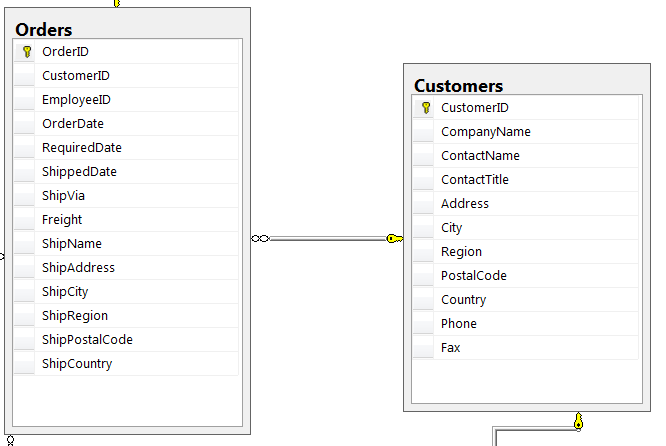
 

If we are showing up the records regardless if some customers ordered any product we should allow the output to show us the records which there is no key matching at the left table as we don't necessarily have that all customers are associated to an order.

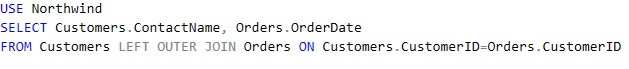

We notice that the two last costumers haven't ordered anything.

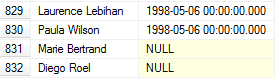

Now we'll look for the supplier names, the **Order ID** and the **Product ID**, we want to show possibly suppliers which hadn't have any ordered products, we have the schema below:

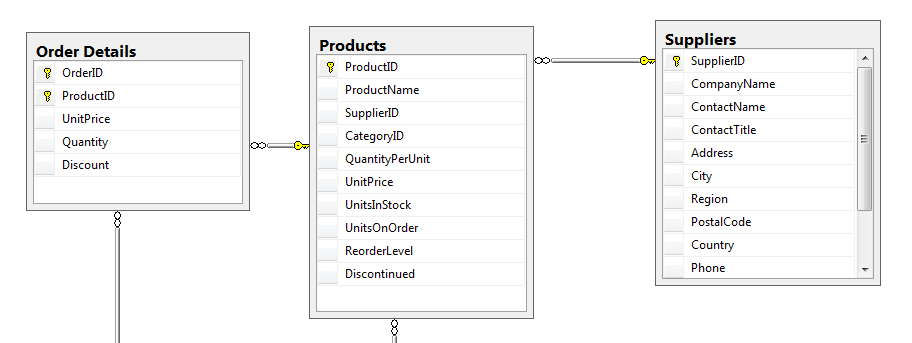

Our script is:

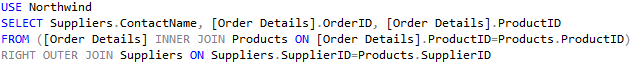

So we're right outer joining the *INNER JOIN* between the two first tables to the **SUPPLIERS** table in order to also show the suppliers names which hadn't have any ordered but we haven't noticed any NULL record, this below is a chunk from the full output:

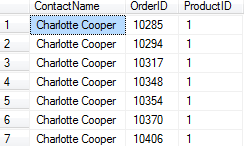

NOTE: I'm not sure if the last script is correct.